11493376/11490434 [==============================] - 54s 5us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 3s 56us/sample - loss: 1.6451 - acc: 0.8678
Epoch 2/15
60000/60000 [==============================] -

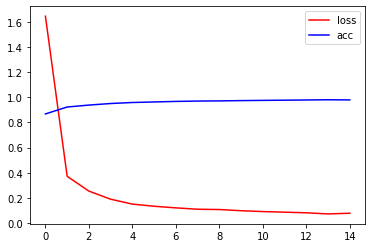

In [1]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# 载入数据
(Xtrain, Ytrain), (Xtest, Ytest) = mnist.load_data()

# 对数据进行标准化处理
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain.reshape(-1, 28 * 28)).reshape(-1, 28, 28)
Xtest_scaled = scaler.transform(Xtest.reshape(-1, 28 * 28)).reshape(-1, 28, 28)

# (60000, 28, 28)
# (10000, 28, 28)
# print(Xtrain_scaled.shape)
# print(Xtest_scaled.shape)

# 建立模型
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

# 编译模型
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['acc'], optimizer='adam')

# 训练模型
history = model.fit(Xtrain, Ytrain, epochs=15)
# dict_keys(['loss', 'acc'])
# print(history.history.keys())

# print(history.epoch)

# 绘制图像，查看loss与acc
plt.plot(history.epoch, history.history['loss'], color='red', label='loss')
plt.plot(history.epoch, history.history['acc'], color='blue', label='acc')
plt.legend()
plt.show()